### Import modules

In [2]:
# TensorFlow and tf.keras
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D               #everage하는 것
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

### load data 
- #### dataset (x: imdb article -> y: text type) ; x 정보는 imdb에 있는 리뷰 article이고, y는 text type이다      
- #### word2idx dict (key: word; value: index)

In [3]:
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.imdb.load_data(num_words=vocab_size)  # 파일 불러오기
word2idx = tensorflow.keras.datasets.imdb.get_word_index()

# 매개변수 vocab_size=10000은 훈련 데이터에서 가장 많이 등장하는 상위 10,000개의 단어를 선택
# 데이터 크기를 적당하게 유지하기 위해 드물에 등장하는 단어는 제외

In [4]:
x_train.shape 

# 25000는 리뷰 개수
# 뒤에는 리뷰마다 길이가 다르기 때문에 빈칸

(25000,)

In [5]:
len(x_train[0]), len(x_train[1])

# 각 리뷰마다 단어 개수가 다름

(218, 189)

In [6]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [7]:
word2idx        #단어들을 알 수 있음.

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [8]:
len(word2idx) # word2idx 안에는 88584개의 단어가 들어있음

88584

In [9]:
y_train[0]

# 0은 부정적 리뷰, 1으 긍정적 리뷰

1

### modifiy word2idx dict (to reflect x_train, x_text)

In [10]:
word2idx = {k:v+3 for k, v in word2idx.items()}          #word2idx ; word to index
word2idx['<PAD>'] = 0
word2idx['<START>'] = 1
word2idx['<UNK>'] = 2            # Unknown
word2idx['<UNUSED>'] = 3

# 이거는 dictionary이기 때문에 k(key), v(value)
# 시험문제) +3을 하는 이유는? word2idx가 for 루프 90000을 도는데, 변하는 게 하나도 없음
# v:k로 만들 수가 있음.
# k:v+3 : 모든 index 값에 3만큼 더한 거 밖에 없음. 위의 단어들을 추가로 넣어주기 위해서 3만큼 더한 거다!
# ex) 이 작업 전에는 love의 index값이 5000이었는데, 이 작업 이후 5003이 됨.
# 정리: 사전을 다르게 update했다라고 이해하자.

### create idx2word: inverse of word2idx

In [11]:
# inverse: key랑 value랑 바뀐 사전
# inverse 사전 만들기: 단어가 무엇인지 재참조하려면 역사전을 만들어야 함.

idx2word = {v:k for k, v in word2idx.items()}

### padding x_train, x_test

In [12]:
# Padding: 평론의 길이를 256개로 맞추는 것. 리뷰의 길이를 같게 맞춰줌.
# pad_sequences 함수 : x_train의 리뷰의(단어의) 길이를 모두 256개로 맞춰주는 것

x_train = pad_sequences(x_train, value=word2idx['<PAD>'], padding='post', maxlen=256)
x_test = pad_sequences(x_test, value=word2idx['<PAD>'], padding='post', maxlen=256)

#post의 의미는 뒷부분에 <PAD>를 넣어줘라

In [13]:
len(x_train[0]), len(x_train[1])

# 두 리뷰의 길이가 같아짐

(256, 256)

In [14]:
x_train.shape

# 25000개의 리뷰의 길이(단어의 개수)가 모두 256

(25000, 256)

In [15]:
print(x_train)

[[   1   14   22 ...    0    0    0]
 [   1  194 1153 ...    0    0    0]
 [   1   14   47 ...    0    0    0]
 ...
 [   1   11    6 ...    0    0    0]
 [   1 1446 7079 ...    0    0    0]
 [   1   17    6 ...    0    0    0]]


### create model

In [16]:
# 입력 크기는 영화 리뷰 데이터셋에 적용된 어휘 사전의 크기(10,000개의 단어)

model = Sequential()
model.add(Embedding(vocab_size, 128))               # Embedding이 어떤 의미를 갖고 있는지가 중요(무조건 시험)
model.add(GlobalAveragePooling1D())
model.add(Dense(1, activation='sigmoid'))

# Embedding(vocab_size, 128, 256) ; 256은 input의 length
# vocab size를 위에서 10000으로 설정해놨음. 동그라미가 10000개 형성
# hidden layer 동그라미 128개 형성 (weight 되어있음)
# 셈회 5장 프린트 뒷장 필기 참고


#단어 하나의 숫자가 input layer에 들어가는 10000개의 node를 커버한다.
# embedding: 총 256개의 숫자를 256x10000으로 바꿔주는 것 (2차원으로 만들어주는 것)
# 시험문제) 256 x10000의 matrix에서 나타나는 1 또는 0의 숫자는 몇개인가?
# 1의 갯수: 256개, 0의 갯수: 256x10000 - 256

# 리뷰 input 256x10000(embedding된 상태) -> weight(10000x128)하면 256x128(128이 hidden layer)(지금 matrix 상태)
# -> vector로 만들어주기 위해 평균작업하면 1x128 (vector 상태)
# 평균작업을 총 몇번을 하는가? 128번-------256번 아닌가? 

# 왜 (10000+1) x 128로 안함? dense면 +1 하지만, embedding이라 안 함.ㅡ 

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [18]:
Adam = tensorflow.keras.optimizers.Adam
model.compile(optimizer = Adam(lr=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
print(model.input_shape)
print(model.output_shape)

(None, None)
(None, 1)


### train model

In [20]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.33)

Train on 16750 samples, validate on 8250 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
16750/16750 [==============================] - 22s 1ms/sample - loss: 0.6551 - acc: 0.7087 - val_loss: 0.5860 - val_acc: 0.7867
Epoch 2/10
16750/16750 [==============================] - 20s 1ms/sample - loss: 0.5045 - acc: 0.8278 - val_loss: 0.4444 - val_acc: 0.8389
Epoch 3/10
16750/16750 [==============================] - 21s 1ms/sample - loss: 0.3862 - acc: 0.8687 - val_loss: 0.3686 - val_acc: 0.8624
Epoch 4/10
16750/16750 [==============================] - 21s 1ms/sample - loss: 0.3211 - acc: 0.8870 - val_loss: 0.3297 - val_acc: 0.8736
Epoch 5/10
16750/16750 [==============================] - 21s 1ms/sample - loss: 0.2804 - acc: 0.9017 - val_loss: 0.3068 - val_acc: 0.8804
Epoch 6/10
16750/16750 [==============================] - 21s 1ms/sample - loss: 0.2510 - acc: 0.9120 - val_loss: 0.2932 - val_acc: 0.8848
Epoch 7/10
16750/16750 [==============================] - 21s 1ms/sam

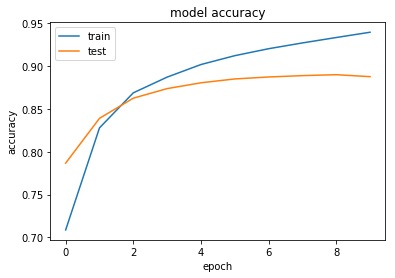

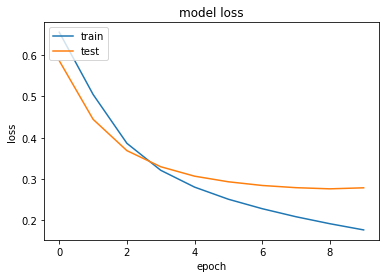

In [21]:
# summarize history for accuracy
plt.plot(history.history['acc'])  # train
plt.plot(history.history['val_acc'])  # test         # val; validation
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### test model

In [22]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 137us/sample - loss: 0.2912 - acc: 0.8798


[0.29123256177902224, 0.87984]

### inference ; predict

In [23]:
testID = 100
print(' '.join([idx2word[idx] for idx in x_test[testID]]))

out = model.predict(x_test[testID].reshape(1,256))
print(y_test[testID])
print(out) 

# <PAD>도 하나의 단어라 생각하며 됨

<START> a quick glance at the premise of this film would seem to indicate just another dumb <UNK> <UNK> <UNK> slash fest the type where sex equals death and the actors are all annoying stereotypes you actually want to die however delivers considerably more br br rather than focus on bare flesh and gore though there is a little of each no sex however the flick focuses on delivering impending dread <UNK> tension amidst a lovely <UNK> backdrop these feelings are further <UNK> by a cast of realistically likable characters and <UNK> that are more amoral than cardboard <UNK> of evil oh yeah george kennedy is here too and when is that not a good thing br br if you liked wrong turn then watch this to see where much of its' <UNK> came from <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <

In [33]:
x_test[100]

array([   1,    6, 1605, 7334,   33,    4,  863,    7,   14,   22,   62,
        306,    8, 7147,   43,  160,  995,    2,    2,    2, 8462, 3340,
          4,  552,  121,  383, 9538,  341,    5,    4,  156,   26,   32,
        616, 2118,   25,  165,  181,    8,  783,  190, 1545, 5779,   53,
         10,   10,  247,   74, 1152,   23, 3883, 2120,    5,  599,  151,
         50,    9,    6,  117,    7,  257,   57,  383,  190,    4,  509,
       2679,   23, 4498, 8153, 6249,    2, 1074, 6929,    6, 1334,    2,
       4157,  134, 1417,   26, 1037,    2,   34,    6,  177,    7, 7292,
       1451,  105,    5,    2,   15,   26,   53, 8955,   74, 3440,    2,
          7,  445,  449, 1243,  742, 4224,    9,  133,   99,    5,   54,
          9,   15,   24,    6,   52,  155,   10,   10,   48,   25,  423,
        355,  471,   95,  106,   14,    8,   67,  121,   76,    7, 9665,
          2,  385,   39,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   